In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Read in data from NASA exoplenet archive 
df = pd.read_csv(r"C:\Users\julia\Downloads\csv_main.csv", skiprows=78)
print(df.columns)

Index(['pl_name', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
       'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj',
       'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
       'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim',
       'sy_dist', 'sy_disterr1', 'sy_d

In [4]:
df_filtered = df[df['pl_orbsmax'] <= 5000]
df_filtered= df_filtered[df_filtered['pl_orbsmax'] > 0]
df_filtered = df_filtered[df_filtered['pl_rade'] < 1000]
df_filtered = df_filtered[df_filtered['pl_bmasse'] < 15000]
df_filtered = df_filtered[df_filtered['pl_orbper'] < 15000]

In [5]:
# Linear Regression Analysis
"""
Performs linear regression analysis between two variables in a DataFrame.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
x_label: Custom label for the x-axis.
y_label: Custom label for the y-axis.
"""

def linear_regression_analysis(df, predictor_var, response_var, x_label, y_label, log=False):
    # Filtering out rows with NaN values in the specified columns
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]]
    y = df_filtered[response_var]  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # Creating a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Displaying the results
    print(f"Linear Regression Analysis for {x_label} vs {y_label}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'Linear Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()

    
# Polynomial Regression Analysis
"""
Performs polynomial regression analysis between two variables in a DataFrame.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
degree: The degree of the polynomial regression.
x_label: Custom label for the x-axis.
y_label: Custom label for the y-axis.
"""

def polynomial_regression_analysis(df, predictor_var, response_var, degree, x_label, y_label, log=False):
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]] 
    y = df_filtered[response_var] 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_train)
    X_test_poly = poly.transform(X_test)
    y_pred_poly = model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    # Print results
    print(f"Polynomial Regression (Degree = {degree}):")
    print("Mean Squared Error:", mse_poly)
    print("R-squared:", r2_poly)

    sorted_indices = np.argsort(X_test.iloc[:, 0])
    X_test_sorted = X_test.iloc[sorted_indices, 0]
    y_test_sorted = y_test.iloc[sorted_indices]
    y_pred_sorted = y_pred_poly[sorted_indices]
    
    # Plot results
    plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual')
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree = {degree}): {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()
    
# Random Forest Regression Analysis
"""
Performs Random Forest regression analysis between two variables in a DataFrame.
Random Forest Regression is a machine learning technique that builds multiple decision trees and merges their outputs.
It is good for regression tasks, and handling non-linear data.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
x_label: Custom label for the x-axis.
y_label: Custom label for the y-axis.
n_estimators: Number of trees in the random forest.
show_feature_importance: Whether to display feature importances.
"""

def random_forest_regression_analysis(df, predictor_var, response_var, x_label, y_label, n_estimators=100, show_feature_importance=False, log=False):
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]]  
    y = df_filtered[response_var]  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Displaying the results
    print("Random Forest Regression:")
    print("Mean Squared Error:", mse_rf)
    print("R-squared:", r2_rf)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred_rf, color='red', label='Predicted')
    plt.title(f'Random Forest Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()

    # Feature Importance
    if show_feature_importance:
        feature_importances = rf_model.feature_importances_
        print("Feature Importances:", feature_importances)
        
# Random Forest Regression Analysis with best parameters
"""
Systematically explores a range of hyperparameters, and selects the set that returns the best results.

Parameters:
df (DataFrame): The DataFrame containing the data.
predictor_var: The name of the column to be used as the predictor variable.
response_var: The name of the column to be used as the response variable.
param_grid: The grid of hyperparameters to search for the best performance.
cv: Number of cross-validation folds.
scoring: Scoring method used for the grid search.
"""        
        
def best_parameters_random_forest(df, predictor_var, response_var, x_label, y_label, param_grid, cv=3, scoring='neg_mean_squared_error', log=False):
    # Filtering out rows with NaN values
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]] 
    y = df_filtered[response_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    rf = RandomForestRegressor(random_state=0)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                               cv=cv, n_jobs=-1, verbose=2, scoring=scoring)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)
    best_rf = RandomForestRegressor(**best_params, random_state=0)
    best_rf.fit(X_train, y_train)
    y_pred_best_rf = best_rf.predict(X_test)
    mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
    r2_best_rf = r2_score(y_test, y_pred_best_rf)

    # Displaying the results
    print("Random Forest Regression with Best Parameters:")
    print("Mean Squared Error:", mse_best_rf)
    print("R-squared:", r2_best_rf)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred_best_rf, color='red', label='Predicted')
    plt.title(f'Optimized Random Forest Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

def neural_network_regression(df, predictor_var, response_var, x_label, y_label, log=False):
    """
    Performs a neural network regression analysis between two variables.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    predictor_var: The name of the column to be used as the predictor variable.
    response_var: The name of the column to be used as the response variable.
    x_label: Label for the x-axis.
    y_label: Label for the y-axis.
    """
    # Filtering out rows with NaN values in the specified columns
    df_filtered = df.dropna(subset=[predictor_var, response_var])
    X = df_filtered[[predictor_var]]
    y = df_filtered[response_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Creating a neural network model
    nn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                            max_iter=1000, random_state=0)

    nn_model.fit(X_train, y_train)
    y_pred_nn = nn_model.predict(X_test)
    mse_nn = mean_squared_error(y_test, y_pred_nn)
    r2_nn = r2_score(y_test, y_pred_nn)

    # Displaying the results
    print("Neural Network Regression:")
    print("Mean Squared Error:", mse_nn)
    print("R-squared:", r2_nn)

    # Plotting the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred_nn, color='red', label='Predicted')
    plt.title(f'Neural Network Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()

Analysis for Orbital period vs Semi-Major Axis
Should be very close to having complete correlation, as thye are directly related by Kepler's 3rd Law

Linear Regression Analysis for Orbital Period vs Semi-Major Axis
Mean Squared Error: 2.6518583544752996
R-squared: 0.7911563873826749


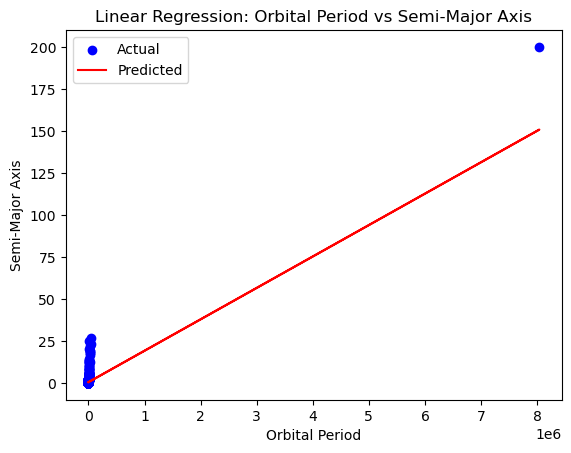

Polynomial Regression (Degree = 2):
Mean Squared Error: 18.143340086539986
R-squared: -0.42885485652851263


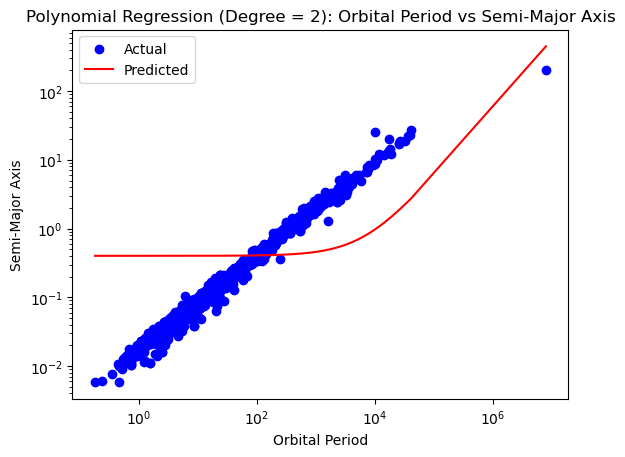

Random Forest Regression:
Mean Squared Error: 1.6655379683444425
R-squared: 0.8688327505602399


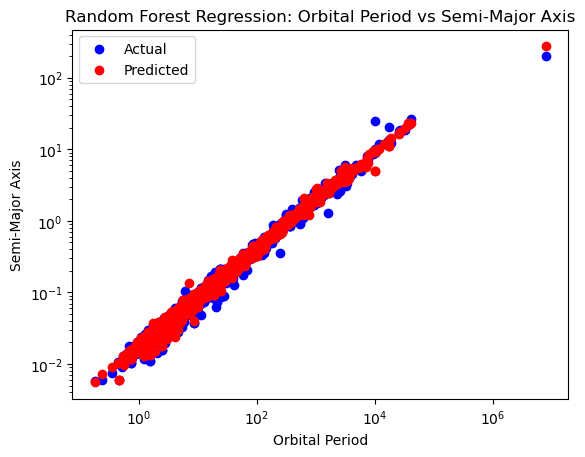

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Regression with Best Parameters:
Mean Squared Error: 7.829839825056961
R-squared: 0.38337127527181003


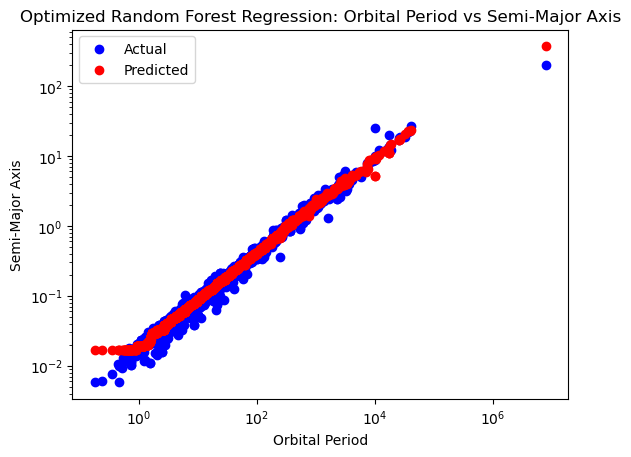

Neural Network Regression:
Mean Squared Error: 116032143.90077221
R-squared: -9137957.696427163


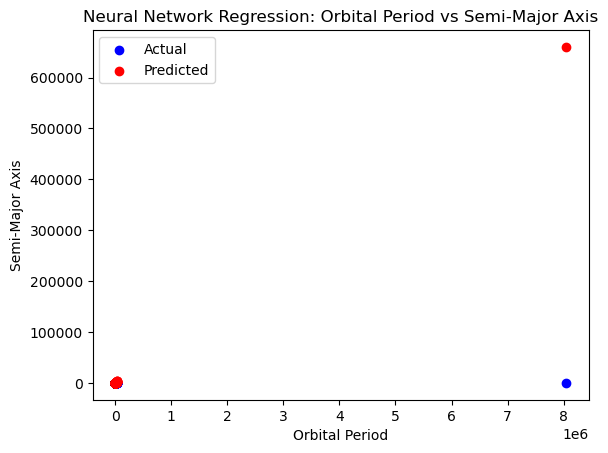

In [6]:
linear_regression_analysis(df, 'pl_orbper', 'pl_orbsmax', 'Orbital Period', 'Semi-Major Axis', log=False)
polynomial_regression_analysis(df, 'pl_orbper', 'pl_orbsmax', 2, 'Orbital Period', 'Semi-Major Axis', log=True)
random_forest_regression_analysis(df, 'pl_orbper', 'pl_orbsmax', 'Orbital Period', 'Semi-Major Axis', n_estimators=100, show_feature_importance=False, log=True)
best_parameters_random_forest(df,'pl_orbper', 'pl_orbsmax', 'Orbital Period', 'Semi-Major Axis', param_grid, cv=3, scoring='neg_mean_squared_error', log=True)
neural_network_regression(df, 'pl_orbper', 'pl_orbsmax', 'Orbital Period', 'Semi-Major Axis')

Analysis for Mass vs Radius

Linear Regression Analysis for Planet Mass vs Planet Radius
Mean Squared Error: 42.77590779427308
R-squared: -0.03578527703002976


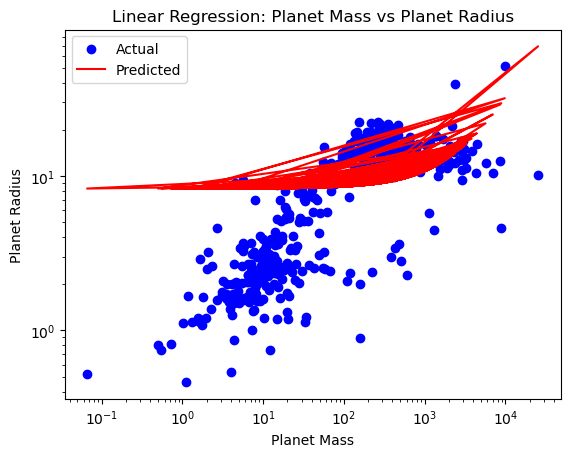

Polynomial Regression (Degree = 2):
Mean Squared Error: 413.4122586850599
R-squared: -9.01045572075607


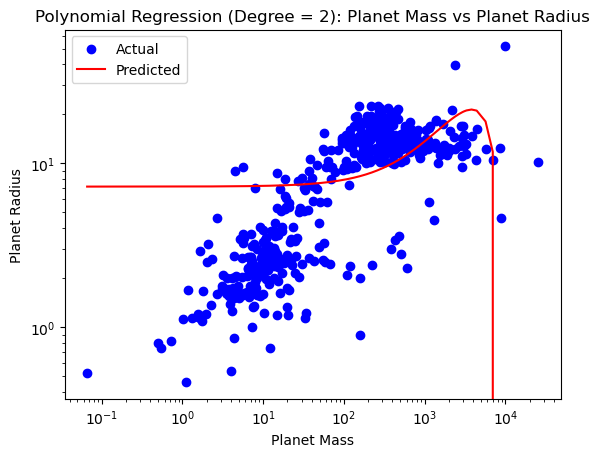

Polynomial Regression (Degree = 3):
Mean Squared Error: 21231.86910597688
R-squared: -513.1131669155103


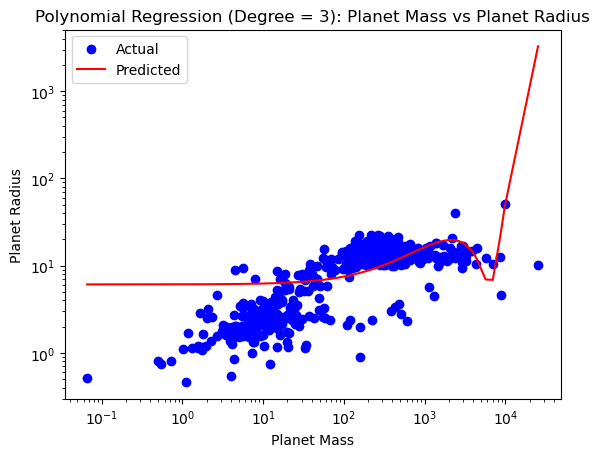

Random Forest Regression:
Mean Squared Error: 15.81452910132614
R-squared: 0.6170635002044396


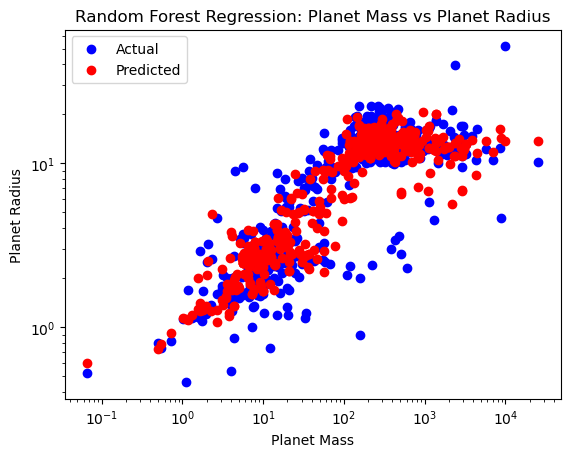

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Regression with Best Parameters:
Mean Squared Error: 13.492908684681879
R-squared: 0.6732797296291344


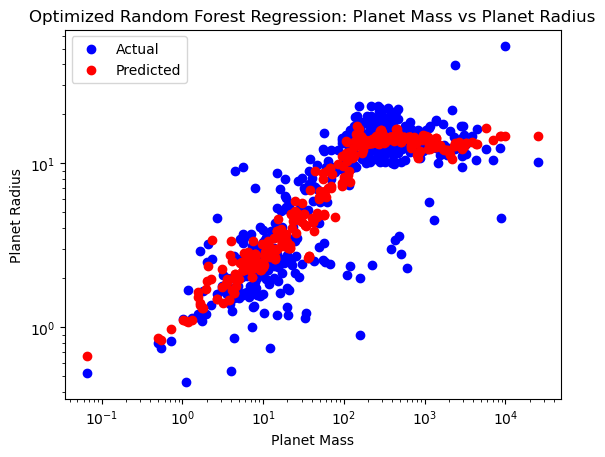

Neural Network Regression:
Mean Squared Error: 25.564829143780788
R-squared: 0.38096758193261504


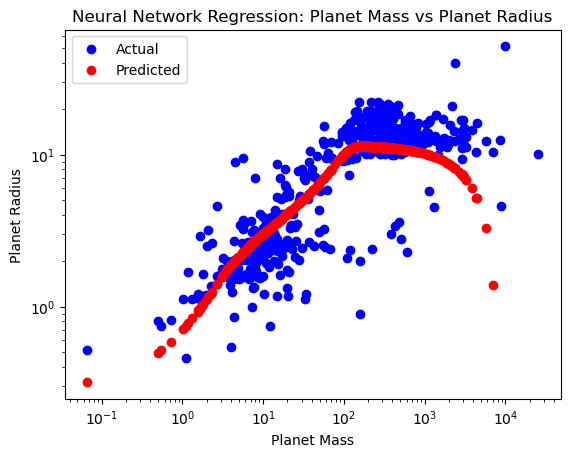

In [11]:
linear_regression_analysis(df, 'pl_bmasse', 'pl_rade', 'Planet Mass', 'Planet Radius', log=False)
polynomial_regression_analysis(df, 'pl_bmasse', 'pl_rade', 2, 'Planet Mass', 'Planet Radius', log=True)
polynomial_regression_analysis(df, 'pl_bmasse', 'pl_rade', 3, 'Planet Mass', 'Planet Radius', log=True)
random_forest_regression_analysis(df, 'pl_bmasse', 'pl_rade', 'Planet Mass', 'Planet Radius', n_estimators=100, show_feature_importance=False, log=True)
best_parameters_random_forest(df,'pl_bmasse', 'pl_rade', 'Planet Mass', 'Planet Radius', param_grid, cv=3, scoring='neg_mean_squared_error', log=True)
neural_network_regression(df, 'pl_bmasse', 'pl_rade', 'Planet Mass', 'Planet Radius', log=True)

Semi-Major Axis vs Planet Radius

Linear Regression Analysis for Semi-Major Axis vs Planet Radius
Mean Squared Error: 11846.173922873453
R-squared: -0.0005055018840405268


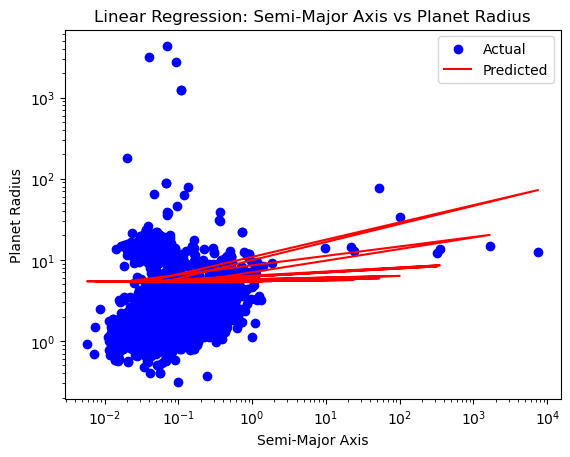

Polynomial Regression (Degree = 2):
Mean Squared Error: 11960.990772137797
R-squared: -0.010202716372522458


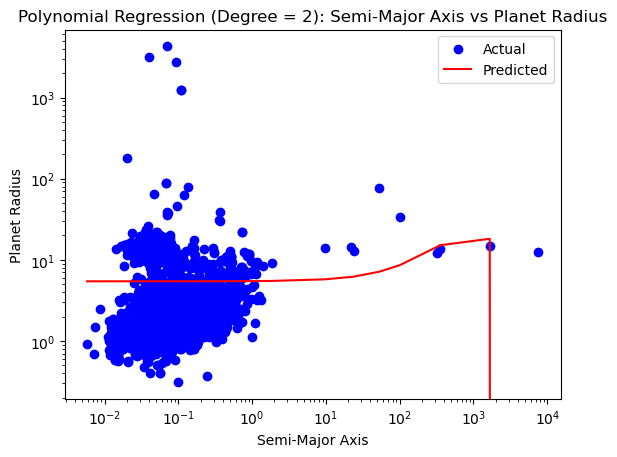

Polynomial Regression (Degree = 3):
Mean Squared Error: 44377.29445264938
R-squared: -2.748022572323845


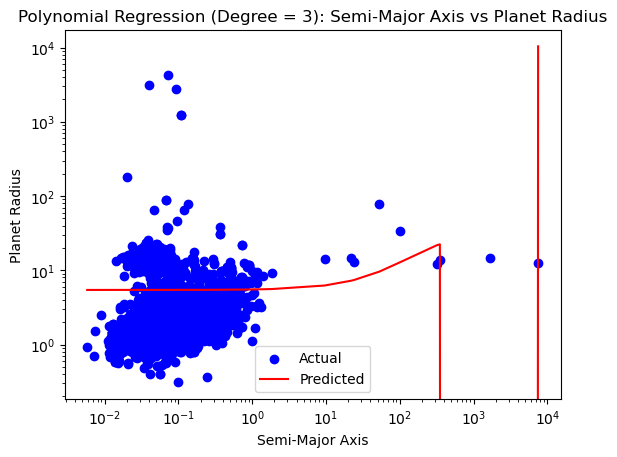

Random Forest Regression:
Mean Squared Error: 11177.776099842331
R-squared: 0.05594611732599908


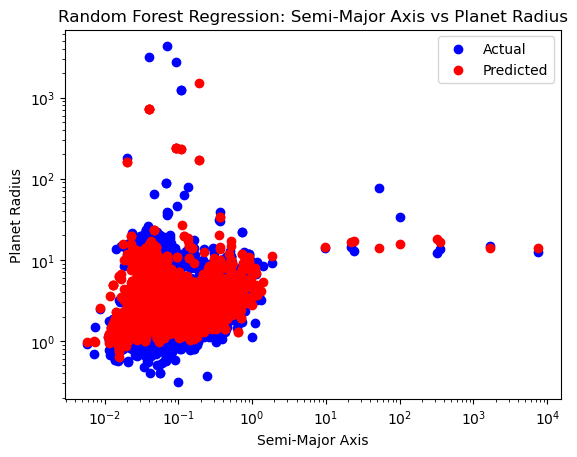

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Regression with Best Parameters:
Mean Squared Error: 11206.087648189628
R-squared: 0.05355497736192738


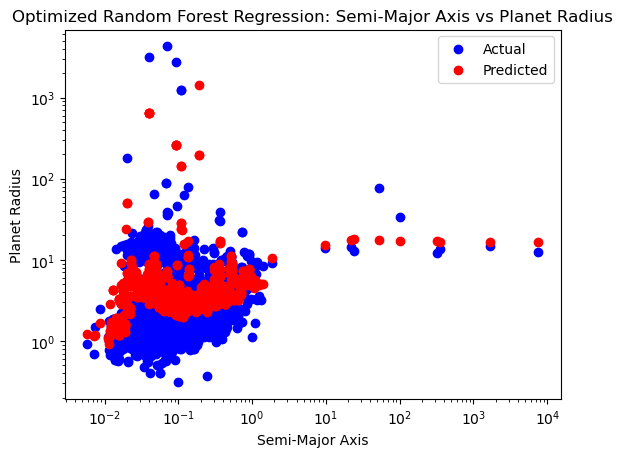

Neural Network Regression:
Mean Squared Error: 11851.38800677228
R-squared: -0.0009458735738387958


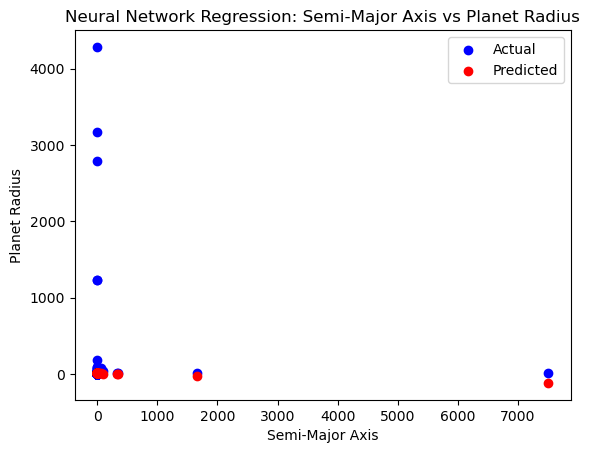

In [7]:
linear_regression_analysis(df, 'pl_orbsmax', 'pl_rade', 'Semi-Major Axis', 'Planet Radius', log=False)
polynomial_regression_analysis(df, 'pl_orbsmax', 'pl_rade', 2, 'Semi-Major Axis', 'Planet Radius', log=True)
polynomial_regression_analysis(df, 'pl_orbsmax', 'pl_rade', 3, 'Semi-Major Axis', 'Planet Radius', log=True)
random_forest_regression_analysis(df, 'pl_orbsmax', 'pl_rade', 'Semi-Major Axis', 'Planet Radius', n_estimators=100, show_feature_importance=False, log=True)
best_parameters_random_forest(df,'pl_orbsmax', 'pl_rade', 'Semi-Major Axis', 'Planet Radius', param_grid, cv=3, scoring='neg_mean_squared_error', log=True)
neural_network_regression(df, 'pl_orbsmax', 'pl_rade', 'Semi-Major Axis', 'Planet Radius')

Semi-Major Axis vs Planet Mass

Linear Regression Analysis for Semi-Major Axis vs Planet Mass
Mean Squared Error: 1958393.8188518856
R-squared: 0.019276403976148604


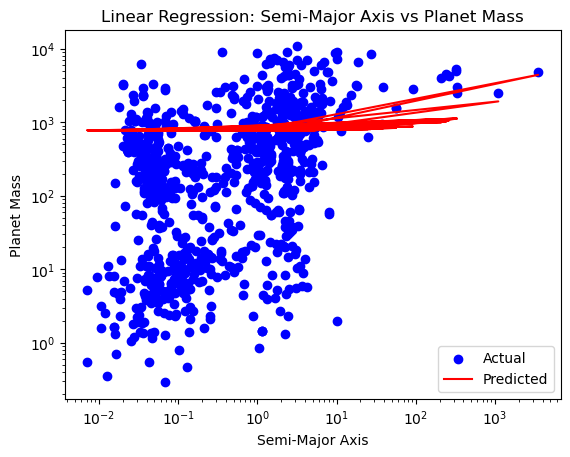

Polynomial Regression (Degree = 2):
Mean Squared Error: 1929239.9987340425
R-squared: 0.033876041203642404


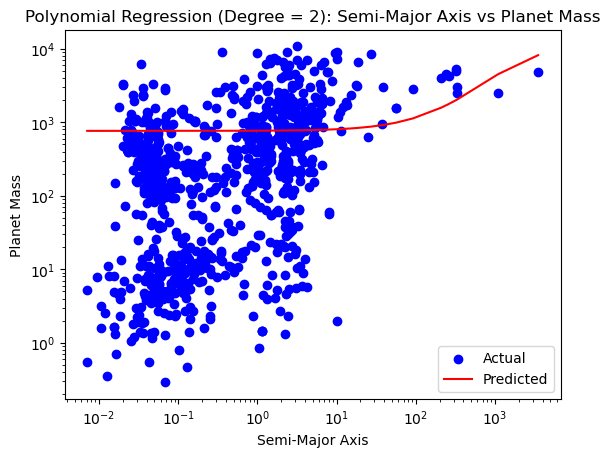

Polynomial Regression (Degree = 3):
Mean Squared Error: 1969334.7731086751
R-squared: 0.013797397711238224


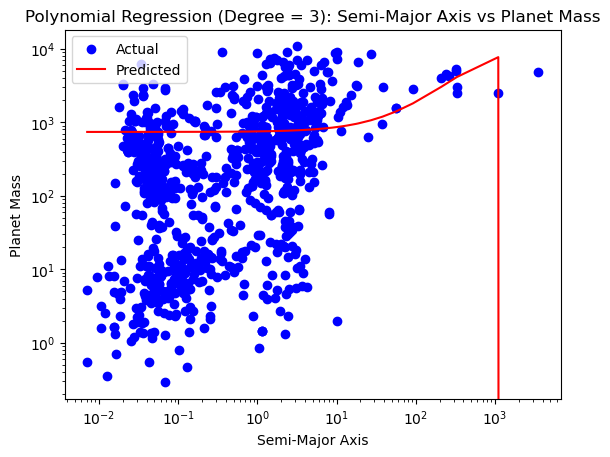

Random Forest Regression:
Mean Squared Error: 2084444.818743407
R-squared: -0.04384736035869197


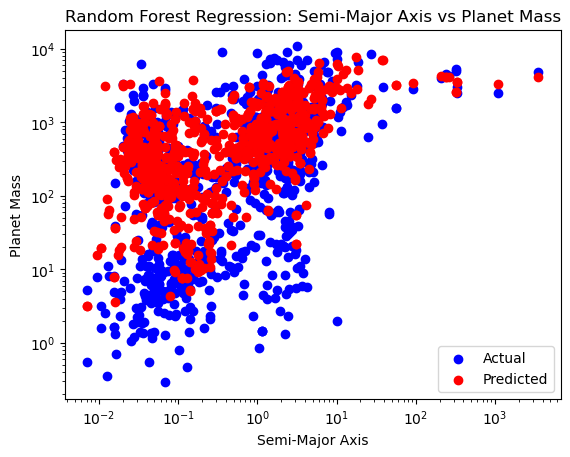

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Regression with Best Parameters:
Mean Squared Error: 1611435.3796107727
R-squared: 0.193026098714693


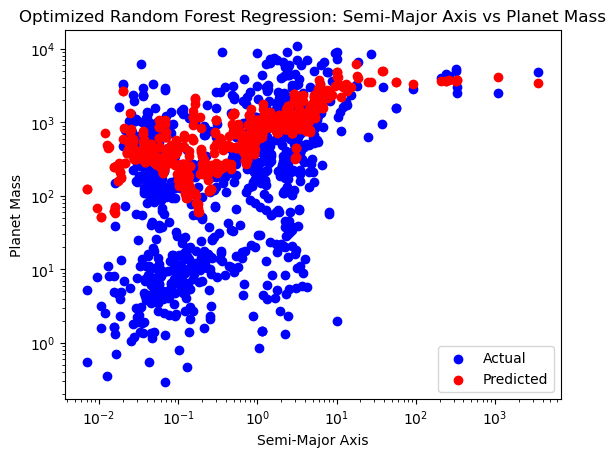

Neural Network Regression:
Mean Squared Error: 1954070.742576091
R-squared: 0.021441312213843267


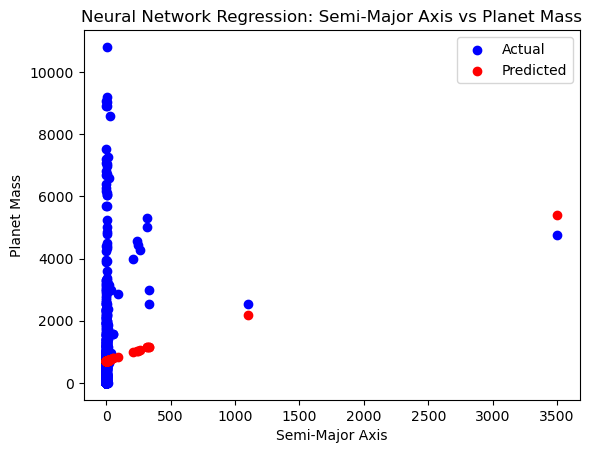

In [15]:
linear_regression_analysis(df, 'pl_orbsmax', 'pl_bmasse', 'Semi-Major Axis', 'Planet Mass', log=True)
polynomial_regression_analysis(df, 'pl_orbsmax', 'pl_bmasse', 2, 'Semi-Major Axis', 'Planet Mass', log=True)
polynomial_regression_analysis(df, 'pl_orbsmax', 'pl_bmasse', 3, 'Semi-Major Axis', 'Planet Mass', log=True)
random_forest_regression_analysis(df, 'pl_orbsmax', 'pl_bmasse', 'Semi-Major Axis', 'Planet Mass', n_estimators=100, show_feature_importance=False, log=True)
best_parameters_random_forest(df,'pl_orbsmax', 'pl_bmasse', 'Semi-Major Axis', 'Planet Mass', param_grid, cv=3, scoring='neg_mean_squared_error', log=True)
neural_network_regression(df, 'pl_orbsmax', 'pl_bmasse', 'Semi-Major Axis', 'Planet Mass')